# Regression Problem

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers,optimizers,models,utils #utils=one hot encode
import numpy as np
import matplotlib.pyplot as plt

In [9]:
(train_data,train_target),(test_data,test_target)=boston_housing.load_data()

In [10]:
print(train_data.shape)
print(test_data.shape)
print(train_target)

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 

# Preparing Data

In [11]:
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

In [12]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

# prepairing data for k-fold cross validation because data set is small 

In [13]:
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

# Validating data 

In [15]:
k=4
num_val_sample=len(train_data)//k
num_epochs=100
all_score=[]
all_mae_histories=[]
for i in range(k):
    print("Processing fold #",i)
    val_data=train_data[i*num_val_sample:(i+1)*num_val_sample]
    val_target=train_target[i*num_val_sample:(i+1)*num_val_sample]
    partial_train_data=np.concatenate([train_data[:i*num_val_sample],train_data[(i+1)*num_val_sample:]]) 
    partial_train_target=np.concatenate([train_target[:i*num_val_sample],train_target[(i+1)*num_val_sample:]])
    model=build_model()
    history=model.fit(partial_train_data,partial_train_target,epochs=num_epochs,batch_size=1,verbose=0)
    val_mse,val_mae=model.evaluate(val_data,val_target,verbose=0)
    all_score.append(val_mae)
    mae_history=history.history['mae']
    all_mae_histories.append(mae_history)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


# error

In [19]:
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print("All fold Validation error: ",all_score)
print('Mean of all Fold Validation error',np.mean(all_score))
print('Average_Mae_History',average_mae_history)


All fold Validation error:  [2.155352830886841, 2.5153040885925293, 2.658518075942993, 2.6131978034973145]
Mean of all Fold Validation error 2.4855931997299194
Average_Mae_History [10.83200979232788, 3.8067245483398438, 3.1536428332328796, 2.8436384797096252, 2.640587568283081, 2.5211440324783325, 2.461329936981201, 2.3421282172203064, 2.30302631855011, 2.292800724506378, 2.2195246815681458, 2.1833719611167908, 2.181999146938324, 2.0636895895004272, 2.0931040048599243, 2.082549750804901, 2.039653241634369, 2.0237239003181458, 2.014267921447754, 1.9749119877815247, 1.9617734551429749, 1.9412752389907837, 1.9154109954833984, 1.9448867738246918, 1.9379437863826752, 1.9021101891994476, 1.8674879670143127, 1.8532353043556213, 1.8219680190086365, 1.8358660638332367, 1.8295074105262756, 1.8076282441616058, 1.796657681465149, 1.8067521452903748, 1.7775298953056335, 1.7302618324756622, 1.7397636771202087, 1.7219398319721222, 1.7239521741867065, 1.7105335593223572, 1.7138870358467102, 1.70508348

In [20]:
[len(x)for x in all_mae_histories]

[100, 100, 100, 100]

# Plotting

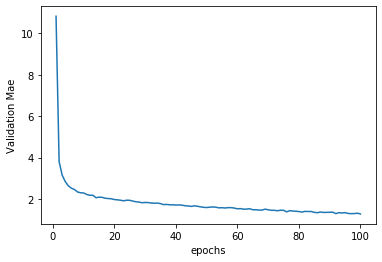

In [21]:
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('epochs')
plt.ylabel('Validation Mae')
plt.show()

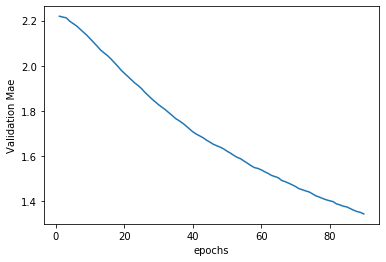

In [26]:
def smooth_curve(points,factor=0.9):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points  
smooth_mae_history=smooth_curve(average_mae_history[10:])
plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('epochs')
plt.ylabel('Validation Mae')
plt.show()

# Training and Validation on Final Dataset


In [28]:
model=build_model()
model.fit(train_data,train_target,epochs=80,batch_size=16,verbose=0)
test_mse_score,test_mae_score=model.evaluate(test_data,test_target)
print(test_mae_score)

4/4 [==============================] - 0s 2ms/step - loss: 16.8295 - mae: 2.6505
2.6505017280578613


In [29]:
print(test_mse_score)

16.82949447631836
